In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.drop(columns="Unnamed: 0", inplace=True)

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### DATA EXPLORATION

Text(0.5, 0, 'Price')

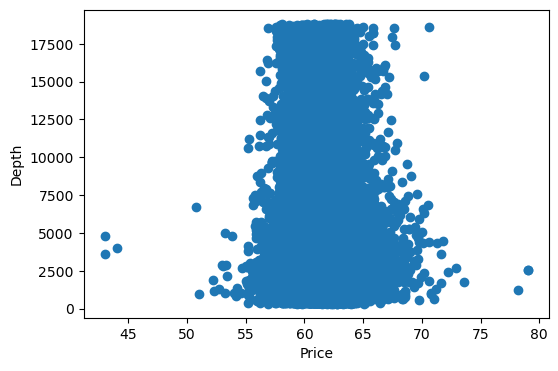

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(x="depth",y="price",data=df)
plt.ylabel("Depth")
plt.xlabel("Price")

<Axes: xlabel='color', ylabel='count'>

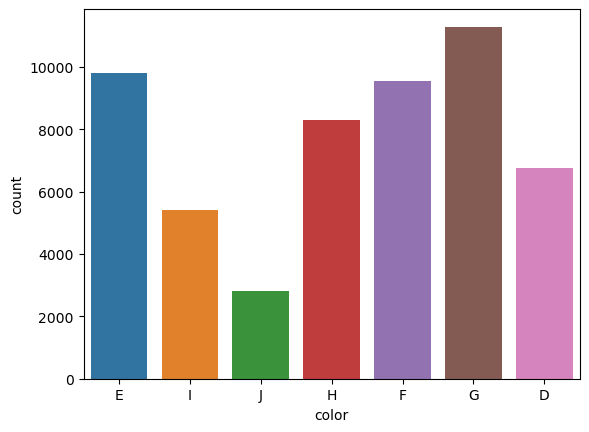

In [7]:
sns.countplot(x="color",data=df)

<Axes: xlabel='cut', ylabel='count'>

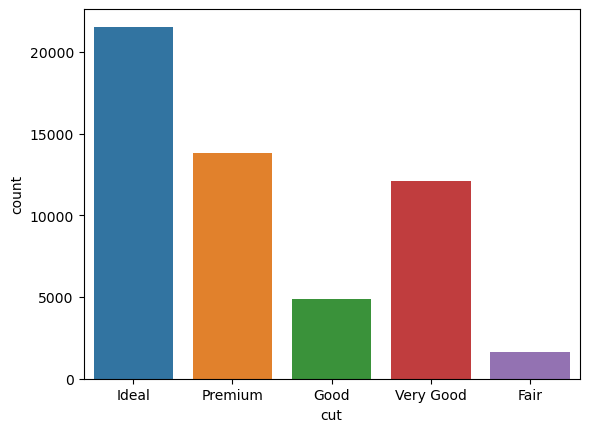

In [8]:
sns.countplot(x="cut",data=df)

### Data Pre-processing and Selection

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [11]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [12]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["cut"]=le.fit_transform(df["cut"])
df["color"]=le.fit_transform(df["color"])
df["clarity"]=le.fit_transform(df["clarity"]) #categorical data in to numerical


In [14]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
df=sklearn.utils.shuffle(df)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
5052,0.31,3,4,2,61.1,57.0,573,4.35,4.32,2.65
24503,1.50,2,3,5,62.5,55.0,12787,7.26,7.23,4.53
32567,0.38,3,2,5,60.5,59.0,800,4.67,4.72,2.84
29413,0.38,4,4,5,60.6,58.0,700,4.68,4.70,2.84
32279,0.30,2,3,6,62.3,54.0,789,4.31,4.33,2.69


In [18]:
X=df.drop('price',axis=1).values
y=df['price'].values

In [19]:
# cross validation test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4)
print('Train set:',X_train.shape,y_train.shape)
print('Test set:',X_test.shape,y_test.shape)

Train set: (43152, 9) (43152,)
Test set: (10788, 9) (10788,)


In [20]:
#score= R sqare
clf=svm.SVR(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7943424571104967

In [22]:
import joblib
joblib.dump(clf,'diamond.joblib')

['diamond.joblib']